## `Airbnb database data exploration` 

In [5]:
import os
os.chdir(r"F:\machinelearning\Task\airbnbprediction")  # Path where files are present
import pandas as pd
import numpy as np

In [6]:
train_data=pd.read_csv('train_users_2.csv')
test_data=pd.read_csv('test_users.csv')
age_gender=pd.read_csv('age_gender_bkts.csv')
sessions=pd.read_csv('sessions.csv')
countries=pd.read_csv('countries.csv')

### Understanding the dataset

In [7]:
 train_data.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [8]:
age_gender.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [9]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [10]:
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


## Visualisation

In [11]:

import matplotlib.pyplot as plt
import seaborn as sns

# Draw inline
%matplotlib inline

#Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 4.0})
sns.set_context("poster", font_scale=1.1)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [12]:
print('Total numbers of users in the train are',train_data.shape[0])

Total numbers of users in the train are 213451


In [13]:
train_data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

#### From this it can be seen that data first booking , age, first affiliated tracked has most number of missing data

In [14]:
train_data.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


######  From above description it is showing that maximum age is 2014 and standard deviation is really high , which may be due to some wrong entry so we have to handle this problem

In [15]:
train_data[train_data['age']>=120]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
388,v2x0ms9c62,2010-04-11,20100411065602,2010-04-13,-unknown-,2014.0,basic,3,en,other,craigslist,untracked,Web,Windows Desktop,Firefox,FR
673,umf1wdk9uc,2010-05-25,20100525155541,NaN,FEMALE,2014.0,basic,2,en,other,craigslist,untracked,Web,Mac Desktop,Safari,NDF
1040,m82epwn7i8,2010-07-14,20100714230556,2010-07-15,MALE,2014.0,facebook,0,en,other,craigslist,untracked,Web,Mac Desktop,Chrome,US
1177,2th813zdx7,2010-07-25,20100725234419,2010-07-26,MALE,2013.0,facebook,3,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
1200,3amf04n3o3,2010-07-27,20100727190447,2010-07-29,FEMALE,2014.0,basic,2,en,direct,direct,untracked,Web,Windows Desktop,IE,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197386,99y83scsje,2014-05-31,20140531031949,2014-05-31,FEMALE,1938.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,US
198888,io7z9esqaj,2014-06-03,20140603074958,2014-10-09,MALE,1924.0,facebook,23,en,direct,direct,untracked,Android,Other/Unknown,-unknown-,US
206249,zmlbfc7cso,2014-06-17,20140617230607,2014-06-20,FEMALE,1947.0,basic,0,en,seo,google,linked,Web,Windows Desktop,Chrome,US
208819,0dn4tfj6gw,2014-06-22,20140622214130,NaN,FEMALE,1949.0,basic,0,en,direct,direct,untracked,Moweb,Android Phone,Chrome Mobile,NDF


### Genders distribution in the data

In [16]:
train_data['gender'].value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [17]:
train_data.gender.replace('-unknown-', np.nan, inplace=True)


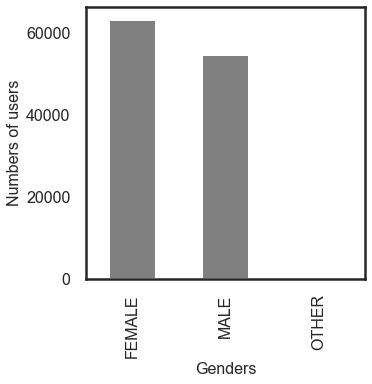

In [18]:
train_data['gender'].value_counts().plot(kind='bar',figsize=(5, 5),fontsize=16, color='gray')
plt.xlabel('Genders',fontsize=16)
plt.ylabel('Numbers of users',fontsize=16)

plt.show()
## now we can see -unknown- are replaced by nan

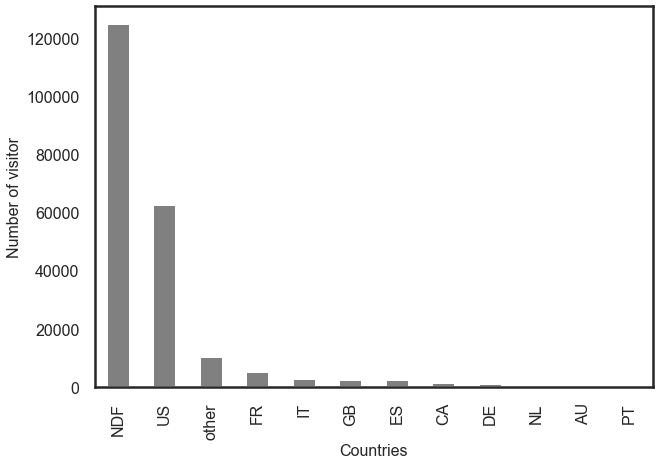

In [19]:
train_data['country_destination'].value_counts().plot(kind='bar',figsize=(10, 7), color='gray',fontsize=16)
plt.xlabel('Countries',fontsize=16)
plt.ylabel('Number of visitor',fontsize=16)
plt.show()

In [20]:
train_data.loc[train_data.age > 95, 'age'] = np.nan
train_data.loc[train_data.age < 13, 'age'] = np.nan
## plot age groups
age_group=train_data[train_data['age']<=120]
age_group

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213441,omlc9iku7t,2014-06-30,20140630235151,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES
213443,0k26r3mir0,2014-06-30,20140630235340,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US
213445,qbxza0xojf,2014-06-30,20140630235547,2014-07-02,FEMALE,23.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,US
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF


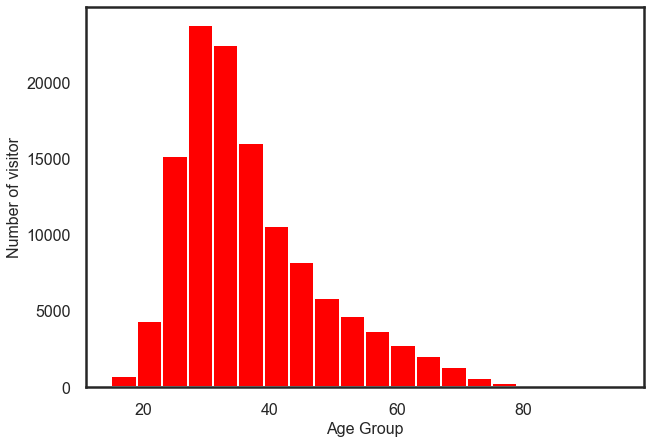

In [21]:
age_group.age.plot(kind='hist',bins=20,figsize=(10, 7), color='red',fontsize=16)
plt.xlabel('Age Group',fontsize=16)
plt.ylabel('Number of visitor',fontsize=16)
plt.show()

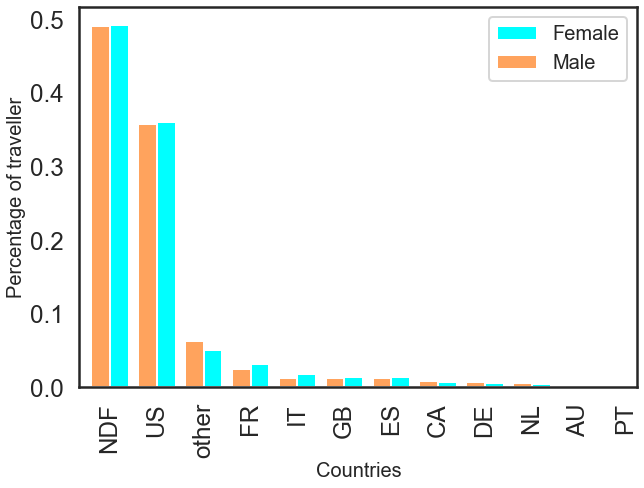

In [22]:
women = (train_data['gender'] == 'FEMALE').sum()
men = (train_data['gender'] == 'MALE').sum()
female_tour=train_data.loc[train_data['gender']=='FEMALE', 'country_destination'].value_counts()/women
male_tour=train_data.loc[train_data['gender']=='MALE','country_destination'].value_counts()/men

female_tour.plot(kind='bar',label='Female',position=0,color='cyan',figsize=(10, 7),width=0.4)
male_tour.plot(kind='bar',label='Male',position=1,color='#FFA35D',figsize=(10, 7),width=0.4)

plt.legend(fontsize=20)
plt.xlabel('Countries',fontsize=20)
plt.ylabel('Percentage of traveller',fontsize=20)

plt.show()


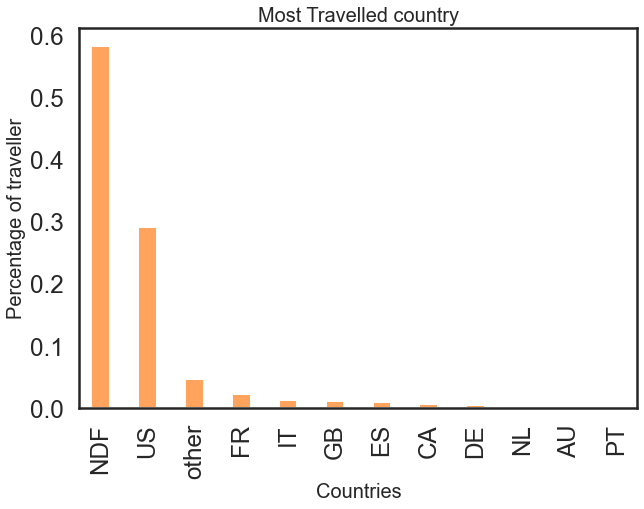

In [23]:
total_traveller=train_data.shape[0]
traveller_percentage=train_data['country_destination'].value_counts()/total_traveller
traveller_percentage.plot(kind='bar',color='#FFA35D',figsize=(10, 7),width=0.4)
plt.xlabel('Countries',fontsize=20)
plt.ylabel('Percentage of traveller',fontsize=20)
plt.title('Most Travelled country',fontsize=20)
plt.show()

## Most Preffered browser for booking tickets

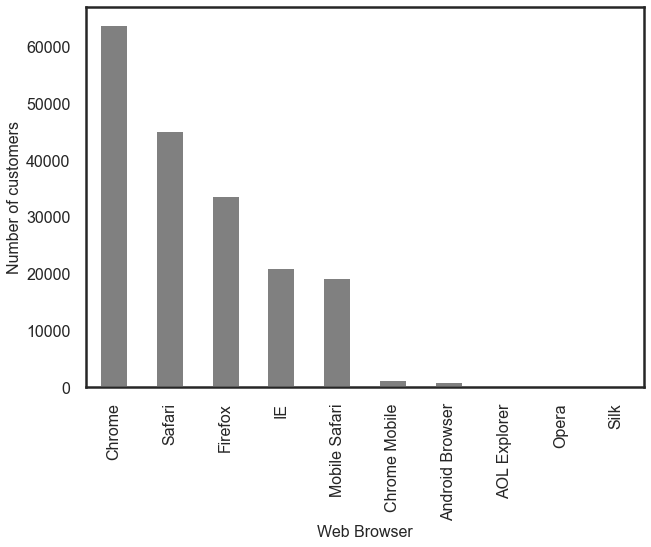

In [24]:
train_data['first_browser'].replace('-unknown-', np.nan, inplace=True)
train_data['first_browser'].value_counts().head(10).plot(kind='bar',figsize=(10, 7), color='gray',fontsize=16)
plt.xlabel('Web Browser',fontsize=16)
plt.ylabel('Number of customers',fontsize=16)
plt.show()


In [25]:
train_data['date_account_created'] = pd.to_datetime(train_data['date_account_created'])
train_data['date_first_booking'] = pd.to_datetime(train_data['date_first_booking'])
train_data['date_first_active'] = pd.to_datetime((train_data.timestamp_first_active // 1000000), format='%Y%m%d')

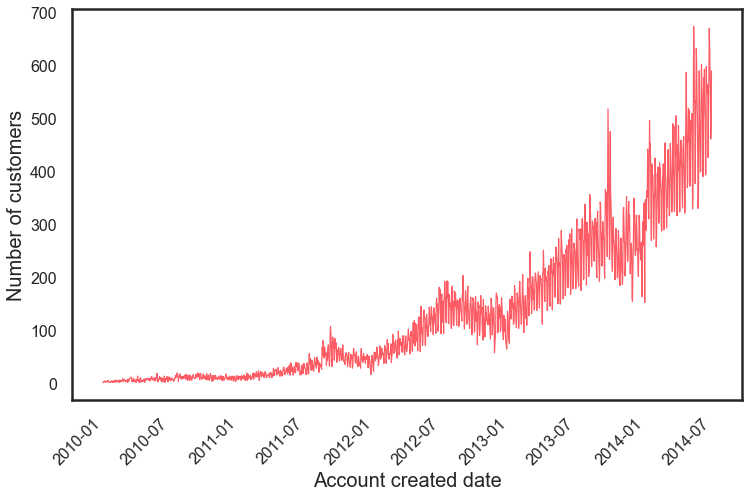

In [26]:
train_data.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64',figsize=(12,8),fontsize=16, rot=45)
plt.xlabel('Account created date',fontsize=20)
plt.ylabel('Number of customers',fontsize=20)
plt.show()

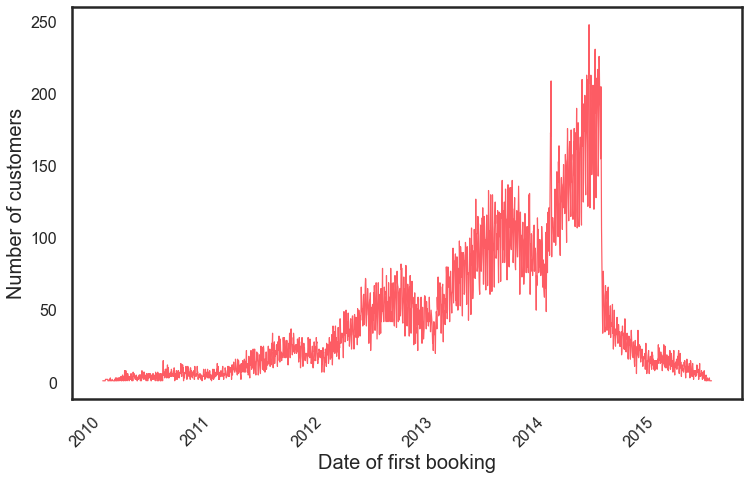

In [27]:
train_data.date_first_booking.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64',figsize=(12,8),fontsize=16, rot=45)
plt.xlabel('Date of first booking',fontsize=20)
plt.ylabel('Number of customers',fontsize=20)
plt.show()


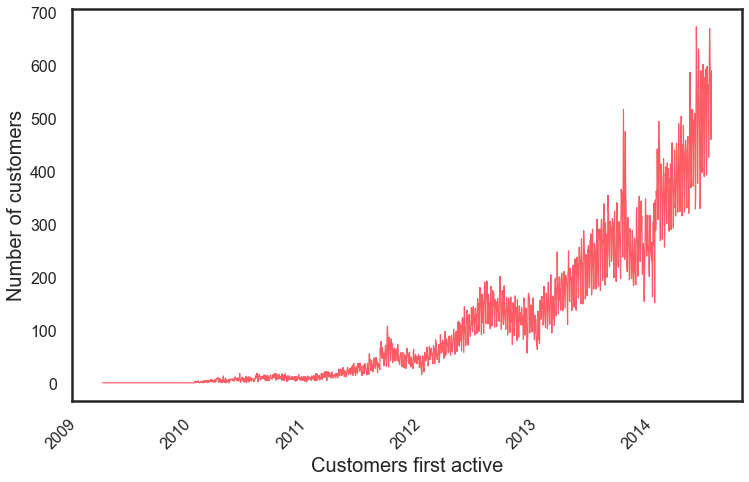

In [28]:
train_data.date_first_active.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64',figsize=(12,8),fontsize=16, rot=45)
plt.xlabel('Customers first active',fontsize=20)
plt.ylabel('Number of customers',fontsize=20)
plt.show()

In [29]:
train_data.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active
0,gxn3p5htnn,2010-06-28,20090319043255,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19
1,820tgsjxq7,2011-05-25,20090523174809,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,NaN,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,2010-01-01
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010-01-02
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,2010-01-03
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010-01-04
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,NaN,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US,2010-01-04


In [30]:
english_speaker=train_data['language'].value_counts()/sum(train_data['language'].value_counts())
print( 'Total number of customers speaking english outoff total population=', english_speaker[0] )

Total number of customers speaking english outoff total population= 0.9665637546790599


In [31]:
## Percentage of missing values
train_data.isnull().sum()/train_data.shape[0]


id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.583473
gender                     0.448290
age                        0.423915
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.028414
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.127739
country_destination        0.000000
date_first_active          0.000000
dtype: float64

## Handling missing values

From above we can see there are 5 columns that have missing values 
- date_first_booking         
- gender
* age   
* first_affiliate_tracked 
* first_browser      
  

In [141]:
train_df=train_data.copy()

In [142]:
train_df['first_browser'].mode()[0]

'Chrome'

In [143]:
train_df[train_df['date_account_created']< '1-01-2014']

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active
0,gxn3p5htnn,2010-06-28,20090319043255,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19
1,820tgsjxq7,2011-05-25,20090523174809,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137016,gqtr7f8k8y,2013-12-31,20131231234448,NaT,FEMALE,29.0,facebook,0,en,sem-brand,google,linked,Web,Windows Desktop,IE,NDF,2013-12-31
137017,ldgdvlu9gz,2013-12-31,20131231235053,NaT,NaN,NaN,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,NDF,2013-12-31
137018,a9had30b9z,2013-12-31,20131231235214,NaT,FEMALE,36.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,NDF,2013-12-31
137019,5sq8raampt,2013-12-31,20131231235833,NaT,NaN,NaN,basic,0,en,direct,direct,linked,Web,Mac Desktop,Firefox,NDF,2013-12-31


In [144]:
x_train=train_df[train_df['date_account_created']<='30-05-2014'].drop('country_destination', axis=1)
y_train=train_df[train_df['date_account_created']<='30-05-2014'].country_destination
x_valid=train_df[train_df['date_account_created']>'30-05-2014'].drop('country_destination', axis=1)
y_valid=train_df[train_df['date_account_created']>'30-05-2014'].country_destination


In [145]:
df1=x_train.copy()
df=df1.copy()

In [146]:
df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,date_first_active
0,gxn3p5htnn,2010-06-28,20090319043255,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2009-03-19
1,820tgsjxq7,2011-05-25,20090523174809,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2009-05-23
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2009-06-09
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2009-10-31
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2009-12-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197307,7sk0mtx70i,2014-05-30,20140530234717,2014-06-01,FEMALE,39.0,basic,0,en,direct,direct,untracked,Web,iPad,Mobile Safari,2014-05-30
197308,noe1fmmevx,2014-05-30,20140530235319,2014-05-31,NaN,24.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,2014-05-30
197309,cchz0z6qjk,2014-05-30,20140530235447,NaT,FEMALE,41.0,facebook,25,en,direct,direct,untracked,iOS,iPhone,NaN,2014-05-30
197310,9pmgqs2295,2014-05-30,20140530235638,NaT,MALE,26.0,basic,25,en,direct,direct,untracked,iOS,iPhone,NaN,2014-05-30


In [147]:
#from sklearn.impute import SimpleImputer
#imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
#imp_mode = SimpleImputer(missing_values=np.nan, strategy='mode')
#imp_mean.fit_transform(x_train['age'])
#imp_mode.fit_transform(x_train['first_browser','first_affiliate_tracked'])



In [148]:
df['first_browser']=df['first_browser'].replace(np.NaN, 'y')
df['first_affiliate_tracked']=df['first_affiliate_tracked'].replace(np.NaN, 'z')
df['age']=df['age'].replace(np.NaN, x_train['age'].mean())
df['gender']=df['gender'].fillna('x')
df.drop(['date_first_booking'], axis=1, inplace=True)


In [149]:

df.isnull().sum()


id                         0
date_account_created       0
timestamp_first_active     0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
date_first_active          0
dtype: int64

In [150]:
df

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,date_first_active
0,gxn3p5htnn,2010-06-28,20090319043255,x,36.646406,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2009-03-19
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2009-05-23
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2009-06-09
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2009-10-31
4,87mebub9p4,2010-09-14,20091208061105,x,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2009-12-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197307,7sk0mtx70i,2014-05-30,20140530234717,FEMALE,39.000000,basic,0,en,direct,direct,untracked,Web,iPad,Mobile Safari,2014-05-30
197308,noe1fmmevx,2014-05-30,20140530235319,x,24.000000,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,2014-05-30
197309,cchz0z6qjk,2014-05-30,20140530235447,FEMALE,41.000000,facebook,25,en,direct,direct,untracked,iOS,iPhone,y,2014-05-30
197310,9pmgqs2295,2014-05-30,20140530235638,MALE,26.000000,basic,25,en,direct,direct,untracked,iOS,iPhone,y,2014-05-30


## Feature Engineering

In [151]:
df.date_account_created.head()

0   2010-06-28
1   2011-05-25
2   2010-09-28
3   2011-12-05
4   2010-09-14
Name: date_account_created, dtype: datetime64[ns]

In [152]:
df['date_firstactive_year']=df['date_first_active'].dt.year
df['date_firstactive_month']=df['date_first_active'].dt.month
df['date_firstactive_day']=df['date_first_active'].dt.day


In [153]:
df['date_account_created_year']=df['date_account_created'].dt.year
df['date_account_created_month']=df['date_account_created'].dt.month
df['date_account_created_day']=df['date_account_created'].dt.day



In [154]:
df.dtypes

id                                    object
date_account_created          datetime64[ns]
timestamp_first_active                 int64
gender                                object
age                                  float64
signup_method                         object
signup_flow                            int64
language                              object
affiliate_channel                     object
affiliate_provider                    object
first_affiliate_tracked               object
signup_app                            object
first_device_type                     object
first_browser                         object
date_first_active             datetime64[ns]
date_firstactive_year                  int64
date_firstactive_month                 int64
date_firstactive_day                   int64
date_account_created_year              int64
date_account_created_month             int64
date_account_created_day               int64
dtype: object

In [155]:
df['signup_flow'].unique()

array([ 0,  3,  2,  1, 24,  8,  6,  5, 10, 25, 12,  4, 16, 15, 20, 21, 23],
      dtype=int64)

In [156]:
df

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,signup_app,first_device_type,first_browser,date_first_active,date_firstactive_year,date_firstactive_month,date_firstactive_day,date_account_created_year,date_account_created_month,date_account_created_day
0,gxn3p5htnn,2010-06-28,20090319043255,x,36.646406,facebook,0,en,direct,direct,...,Web,Mac Desktop,Chrome,2009-03-19,2009,3,19,2010,6,28
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.000000,facebook,0,en,seo,google,...,Web,Mac Desktop,Chrome,2009-05-23,2009,5,23,2011,5,25
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.000000,basic,3,en,direct,direct,...,Web,Windows Desktop,IE,2009-06-09,2009,6,9,2010,9,28
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.000000,facebook,0,en,direct,direct,...,Web,Mac Desktop,Firefox,2009-10-31,2009,10,31,2011,12,5
4,87mebub9p4,2010-09-14,20091208061105,x,41.000000,basic,0,en,direct,direct,...,Web,Mac Desktop,Chrome,2009-12-08,2009,12,8,2010,9,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197307,7sk0mtx70i,2014-05-30,20140530234717,FEMALE,39.000000,basic,0,en,direct,direct,...,Web,iPad,Mobile Safari,2014-05-30,2014,5,30,2014,5,30
197308,noe1fmmevx,2014-05-30,20140530235319,x,24.000000,basic,0,en,direct,direct,...,Web,Windows Desktop,Chrome,2014-05-30,2014,5,30,2014,5,30
197309,cchz0z6qjk,2014-05-30,20140530235447,FEMALE,41.000000,facebook,25,en,direct,direct,...,iOS,iPhone,y,2014-05-30,2014,5,30,2014,5,30
197310,9pmgqs2295,2014-05-30,20140530235638,MALE,26.000000,basic,25,en,direct,direct,...,iOS,iPhone,y,2014-05-30,2014,5,30,2014,5,30


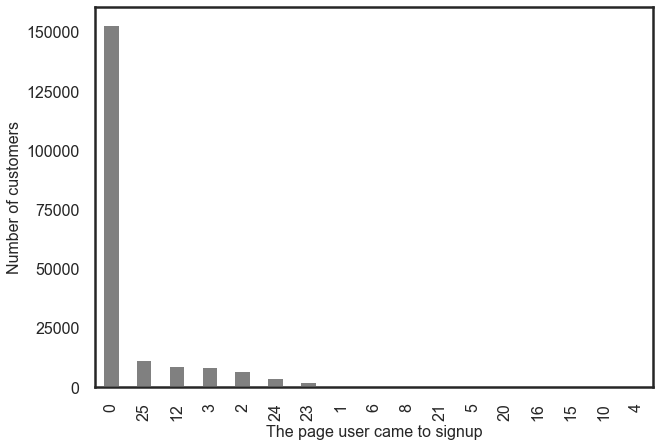

In [157]:
df['signup_flow'].value_counts().plot(kind='bar',figsize=(10, 7), color='gray',fontsize=16)
plt.xlabel('The page user came to signup',fontsize=16)
plt.ylabel('Number of customers',fontsize=16)
plt.show()

In [158]:
df.drop(['id','timestamp_first_active','date_account_created','date_first_active','first_browser','affiliate_provider'], axis=1,inplace=True)

In [159]:
df.dtypes

gender                         object
age                           float64
signup_method                  object
signup_flow                     int64
language                       object
affiliate_channel              object
first_affiliate_tracked        object
signup_app                     object
first_device_type              object
date_firstactive_year           int64
date_firstactive_month          int64
date_firstactive_day            int64
date_account_created_year       int64
date_account_created_month      int64
date_account_created_day        int64
dtype: object

In [160]:
numeric_cols=['age','signup_flow','date_firstactive_year', 'date_firstactive_month','date_firstactive_day','date_account_created_year','date_account_created_month','date_account_created_day']
#numeric_cols=['age','signup_flow']

In [161]:
df

,gender,age,signup_method,signup_flow,language,affiliate_channel,first_affiliate_tracked,signup_app,first_device_type,date_firstactive_year,date_firstactive_month,date_firstactive_day,date_account_created_year,date_account_created_month,date_account_created_day
0,x,36.646406,facebook,0,en,direct,untracked,Web,Mac Desktop,2009,3,19,2010,6,28
1,MALE,38.000000,facebook,0,en,seo,untracked,Web,Mac Desktop,2009,5,23,2011,5,25
2,FEMALE,56.000000,basic,3,en,direct,untracked,Web,Windows Desktop,2009,6,9,2010,9,28
3,FEMALE,42.000000,facebook,0,en,direct,untracked,Web,Mac Desktop,2009,10,31,2011,12,5
4,x,41.000000,basic,0,en,direct,untracked,Web,Mac Desktop,2009,12,8,2010,9,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197307,FEMALE,39.000000,basic,0,en,direct,untracked,Web,iPad,2014,5,30,2014,5,30
197308,x,24.000000,basic,0,en,direct,untracked,Web,Windows Desktop,2014,5,30,2014,5,30
197309,FEMALE,41.000000,facebook,25,en,direct,untracked,iOS,iPhone,2014,5,30,2014,5,30
197310,MALE,26.000000,basic,25,en,direct,untracked,iOS,iPhone,2014,5,30,2014,5,30


In [162]:
categorical_cols=df.select_dtypes('object').columns.tolist()
categorical_cols

['gender',
 'signup_method',
 'language',
 'affiliate_channel',
 'first_affiliate_tracked',
 'signup_app',
 'first_device_type']

## Normalisation and handling categorical column

In [163]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
onehot=encoder.fit_transform(df[categorical_cols])


In [164]:
encoder.categories_



[array(['FEMALE', 'MALE', 'OTHER', 'x'], dtype=object),
 array(['basic', 'facebook', 'google'], dtype=object),
 array(['ca', 'cs', 'da', 'de', 'el', 'en', 'es', 'fi', 'fr', 'hr', 'hu',
        'id', 'is', 'it', 'ja', 'ko', 'nl', 'no', 'pl', 'pt', 'ru', 'sv',
        'th', 'tr', 'zh'], dtype=object),
 array(['api', 'content', 'direct', 'other', 'remarketing', 'sem-brand',
        'sem-non-brand', 'seo'], dtype=object),
 array(['linked', 'local ops', 'marketing', 'omg', 'product',
        'tracked-other', 'untracked', 'z'], dtype=object),
 array(['Android', 'Moweb', 'Web', 'iOS'], dtype=object),
 array(['Android Phone', 'Android Tablet', 'Desktop (Other)',
        'Mac Desktop', 'Other/Unknown', 'SmartPhone (Other)',
        'Windows Desktop', 'iPad', 'iPhone'], dtype=object)]

In [165]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)

61

In [166]:
df[encoded_cols]=onehot


In [167]:
df.columns

Index(['gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'date_firstactive_year', 'date_firstactive_month',
       'date_firstactive_day', 'date_account_created_year',
       'date_account_created_month', 'date_account_created_day',
       'gender_FEMALE', 'gender_MALE', 'gender_OTHER', 'gender_x',
       'signup_method_basic', 'signup_method_facebook', 'signup_method_google',
       'language_ca', 'language_cs', 'language_da', 'language_de',
       'language_el', 'language_en', 'language_es', 'language_fi',
       'language_fr', 'language_hr', 'language_hu', 'language_id',
       'language_is', 'language_it', 'language_ja', 'language_ko',
       'language_nl', 'language_no', 'language_pl', 'language_pt',
       'language_ru', 'language_sv', 'language_th', 'language_tr',
       'language_zh', 'affiliate_channel_api', 'affiliate_channel_content',
       'affiliate_channel_direct',

In [168]:
 #Numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[numeric_cols])
df[numeric_cols] = scaler.transform(df[numeric_cols])


In [169]:
df

,gender,age,signup_method,signup_flow,language,affiliate_channel,first_affiliate_tracked,signup_app,first_device_type,date_firstactive_year,...,signup_app_iOS,first_device_type_Android Phone,first_device_type_Android Tablet,first_device_type_Desktop (Other),first_device_type_Mac Desktop,first_device_type_Other/Unknown,first_device_type_SmartPhone (Other),first_device_type_Windows Desktop,first_device_type_iPad,first_device_type_iPhone
0,x,0.27058,facebook,0.00,en,direct,untracked,Web,Mac Desktop,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,MALE,0.28750,facebook,0.00,en,seo,untracked,Web,Mac Desktop,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,FEMALE,0.51250,basic,0.12,en,direct,untracked,Web,Windows Desktop,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,FEMALE,0.33750,facebook,0.00,en,direct,untracked,Web,Mac Desktop,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,x,0.32500,basic,0.00,en,direct,untracked,Web,Mac Desktop,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197307,FEMALE,0.30000,basic,0.00,en,direct,untracked,Web,iPad,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
197308,x,0.11250,basic,0.00,en,direct,untracked,Web,Windows Desktop,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
197309,FEMALE,0.32500,facebook,1.00,en,direct,untracked,iOS,iPhone,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197310,MALE,0.13750,basic,1.00,en,direct,untracked,iOS,iPhone,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [170]:
df.drop(columns=categorical_cols, inplace=True)

## Medelling
- `To start first figure out how to model multiple output classification model`

## Random Forest Classifier

In [350]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200, max_depth=10, random_state=1)

In [351]:
rfc_model=rfc.fit(df,y_train)

In [352]:
predict_train=rfc.predict(df)

In [353]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [354]:
confusion_matrix(y_train, predict_train)
accuracy_score(y_train, predict_train)

0.6269601532644724

In [355]:
def predict_values(df2,testmodel):
    df1=df2.copy()
    df1.loc[df1.age > 95, 'age'] = np.nan
    df1.loc[df1.age < 13, 'age'] = np.nan
    df1.gender.replace('-unknown-', np.nan, inplace=True)

    df1['date_account_created'] = pd.to_datetime(df1['date_account_created'])
    df1['date_first_booking'] = pd.to_datetime(df1['date_first_booking'])
    df1['date_first_active'] = pd.to_datetime((df1.timestamp_first_active // 1000000), format='%Y%m%d')
    
    
    df1['first_browser']=df1['first_browser'].replace(np.NaN, 'y')
    df1['first_affiliate_tracked']=df1['first_affiliate_tracked'].replace(np.NaN, 'z')
    df1['age']=df1['age'].replace(np.NaN, df1['age'].mean())
    df1['gender']=df1['gender'].fillna('x')
    
    df1.drop(['date_first_booking'], axis=1, inplace=True)
    
    
    df1['date_firstactive_year']=df1['date_first_active'].dt.year
    df1['date_firstactive_month']=df1['date_first_active'].dt.month
    df1['date_firstactive_day']=df1['date_first_active'].dt.day

    df1['date_account_created_year']=df1['date_account_created'].dt.year
    df1['date_account_created_month']=df1['date_account_created'].dt.month
    df1['date_account_created_day']=df1['date_account_created'].dt.day
 

    df1.drop(['id','timestamp_first_active','date_account_created','date_first_active','first_browser','affiliate_provider'], axis=1,inplace=True)
    #numeric_cols = df.select_dtypes('float64').columns.tolist()
    numeric_cols=['age','signup_flow','date_firstactive_year', 'date_firstactive_month','date_firstactive_day','date_account_created_year','date_account_created_month','date_account_created_day']

    #categorical_cols = df.select_dtypes('object').columns.tolist()
    #numeric_cols=['age','signup_flow']
    categorical_cols=df1.select_dtypes('object').columns.tolist()
    onehot=encoder.transform(df1[categorical_cols])
    df1[encoded_cols]=onehot
    df1.drop(columns=categorical_cols, inplace=True)
    df1[numeric_cols] = scaler.transform(df1[numeric_cols])
    
    model=testmodel
    predict_output=model.predict(df1)
    return predict_output 

In [356]:
valid_predictionrfc=predict_values(x_valid,rfc_model)

In [357]:
print('The accuracy score on the Test dataset is=', accuracy_score(y_train, predict_train))
print('The accuracy score on the validation dataset is=', accuracy_score(y_valid, valid_predictionrfc))

The accuracy score on the Test dataset is= 0.6269601532644724
The accuracy score on the validation dataset is= 0.5300092908021059


### K- Nearest neighbors Model

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=12)
knn_model=knn.fit(df,y_train)
knn_predict=knn_model.predict(df)

In [82]:
from sklearn.metrics import confusion_matrix , accuracy_score
confusion_matrix( knn_predict,y_train,)
accuracy_score(knn_predict,y_train,)

0.6387996310299737

In [358]:
valid_predictionknn=predict_values(x_valid,knn_model)

In [359]:
print('The accuracy score on the Test dataset is=', accuracy_score(y_train, knn_predict))
print('The accuracy score on the validation dataset is=', accuracy_score(y_valid, valid_predictionknn))

The accuracy score on the Test dataset is= 0.6387996310299737
The accuracy score on the validation dataset is= 0.6264478166615051


## Decision Tree Model

In [346]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=20,random_state=1)
clf_model = clf_tree.fit(df, y_train)
clf_predict=clf_model.predict(df)


In [347]:
confusion_matrix( clf_predict,y_train,)
accuracy_score(clf_predict,y_train,)

0.7262526228295135

In [348]:
valid_predictionclf=predict_values(x_valid,clf_model)

In [349]:
print('The accuracy score on the Test dataset is=', accuracy_score(y_train, clf_predict))
print('The accuracy score on the validation dataset is=', accuracy_score(y_valid, valid_predictionclf))

The accuracy score on the Test dataset is= 0.7262526228295135
The accuracy score on the validation dataset is= 0.4379064725921338
